In [1]:
# Importing preprocessed dataset
import pandas as pd
df = pd.read_csv('cleaned_data_filtered.csv')

In [2]:
print(df.shape)

(231610, 8)


In [3]:
df.describe()

,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,calories
count,231610.000000,231610.000000,231610.000000,231610.000000,231610.000000,231610.000000,231610.000000
mean,35.758033,82.000695,29.898981,34.475454,45.247541,15.301010,468.624464
std,63.946631,244.748418,115.626084,50.752417,89.271381,29.720792,681.550287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,9.000000,5.000000,7.000000,7.000000,4.000000,174.300000
50%,20.000000,25.000000,14.000000,18.000000,23.000000,9.000000,313.400000
75%,41.000000,68.000000,33.000000,51.000000,52.000000,16.000000,519.600000
max,2713.000000,12914.000000,14664.000000,3351.000000,4610.000000,1098.000000,17287.500000


In [4]:
df.head()

,name,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,calories
0,arriba baked winter squash mexican style,0,13,0,2,0,4,51.5
1,a bit different breakfast pizza,18,0,17,22,35,1,173.4
2,all in the kitchen chili,22,32,48,39,27,5,269.8
3,alouette potatoes,17,10,2,14,8,20,368.1
4,amish tomato ketchup for canning,1,337,23,3,0,28,352.9


In [5]:
df = df.drop(columns=['name'])

In [6]:
df.head()

,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,calories
0,0,13,0,2,0,4,51.5
1,18,0,17,22,35,1,173.4
2,22,32,48,39,27,5,269.8
3,17,10,2,14,8,20,368.1
4,1,337,23,3,0,28,352.9


In [7]:
#Separating features X from labels y
y = df['calories'].to_numpy()
X = df.drop(columns=['calories']).to_numpy()

In [8]:
# Scaling the data and dividing dataset into training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2)

In [9]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test) #testing accuracy

0.992620592057056

In [10]:
LR.score(X_train, y_train) #training accuracy

0.993895596244741

In [11]:
#X_test = scaler.transform(X)
y_pred = LR.predict(X_test)
y_pred

array([ 47.47336614, 348.41712595, 170.58836331, ..., 473.518418  ,
       289.44292789, 330.7551085 ])

In [12]:
print(y)

[ 51.5 173.4 269.8 ...  59.2 188.  174.9]


In [13]:
print(X)

[[ 0 13  0  2  0  4]
 [18  0 17 22 35  1]
 [22 32 48 39 27  5]
 ...
 [ 6  2  3  6  5  0]
 [11 57 11  7 21  9]
 [14 33  4  4 11  6]]


In [14]:
import numpy as np

# Creating a sample input
sample_input = np.array([22, 32, 48, 39, 27, 5]) #This is the same as the third sample, so we're expecting something close to 269.8 calories

# Reshaping (1, num_features)
sample_input = sample_input.reshape(1, -1)

sample_input_scaled = scaler.transform(sample_input)  # Use the same scaler from training

# Making prediction
predicted_value = LR.predict(sample_input_scaled)

print("Predicted Calories:", predicted_value)

Predicted Calories: [280.25538234]


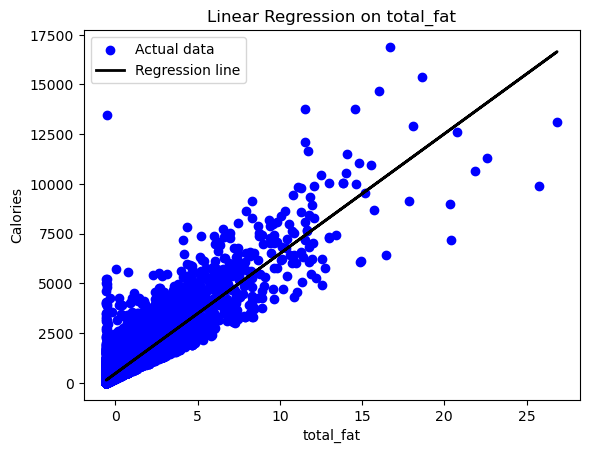

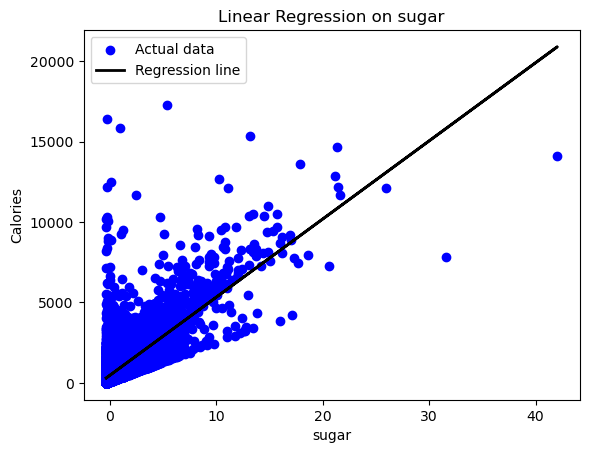

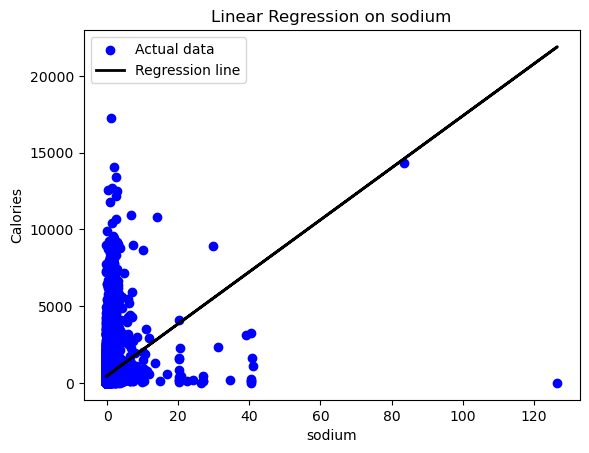

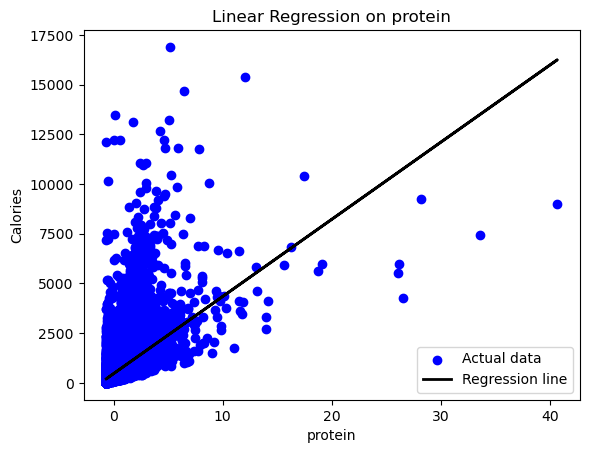

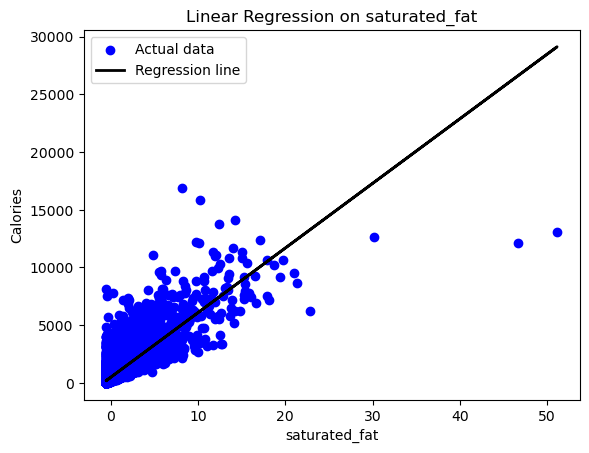

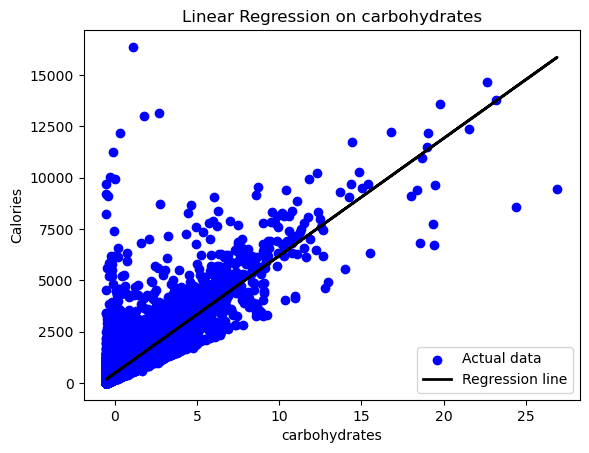

In [15]:
# Plotting linear regression between each nutrtional value and the calories
from matplotlib import pyplot as plt
for i in range(6):
    feature_index = i
    
    # Splitting using single feature
    X_single = X[:, feature_index].reshape(-1, 1)
    single_scaler = StandardScaler()
    X_single_scaled = single_scaler.fit_transform(X_single)
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single_scaled,y, test_size = 0.2)
    
    # Fitting model using only one feature
    LR_single = LinearRegression()
    LR_single.fit(X_train_single, y_train_single)
    
    y_pred_single = LR_single.predict(X_test_single)
    
    # Plotting the actual data points
    plt.scatter(X_test_single, y_test_single, color='b', label="Actual data")
    
    # Plotting the regression line
    plt.plot(X_test_single, y_pred_single, color='k', linewidth=2, label="Regression line")

    # Getting the feature names from the data
    feature_names = df.drop(columns=['calories']).columns
    feature_name = feature_names[feature_index]
    
    plt.xlabel(feature_name)
    plt.ylabel("Calories")
    plt.legend()
    plt.title(f"Linear Regression on {feature_name}")
    plt.show()

In [16]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
  
print("MAE:", mae) 
print("MSE:", mse) 
print("RMSE:", rmse)
print("r2:", r2)

MAE: 13.991000555367206
MSE: 3397.181255944876
RMSE: 58.28534340591017
r2: 0.992620592057056


In [17]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X, y, cv=5) #X and y will be split into folds
(scores)

array([0.99270771, 0.99471335, 0.99409923, 0.99427776, 0.99206152])

In [18]:
from sklearn.model_selection import cross_validate #more comprehensive: gives time, can show training scores, can show results for multiple metrics
scores = cross_validate(LR, X, y, cv=5, return_train_score= True, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_squared_error')) #X and y will be split into folds
print(scores)

{'fit_time': array([0.03178382, 0.03027272, 0.03010821, 0.02901912, 0.0377028 ]), 'score_time': array([0.00589585, 0.00219059, 0.00504112, 0.00495338, 0.00547028]), 'test_r2': array([0.99270771, 0.99471335, 0.99409923, 0.99427776, 0.99206152]), 'train_r2': array([0.99388072, 0.99335255, 0.99353375, 0.99347147, 0.99397366]), 'test_neg_root_mean_squared_error': array([-58.4900765 , -51.29278249, -51.84073421, -53.33790108,
       -56.48042629]), 'train_neg_root_mean_squared_error': array([-53.24294217, -55.06963419, -54.93699595, -54.57870031,
       -53.78148324]), 'test_neg_mean_absolute_error': array([-14.16349978, -13.72851608, -13.76274833, -13.82619856,
       -13.66514286]), 'train_neg_mean_absolute_error': array([-13.60651216, -13.87957003, -13.90745852, -13.68320508,
       -14.00725156]), 'test_neg_mean_squared_error': array([-3421.08904928, -2630.94953569, -2687.46172361, -2844.93169165,
       -3190.03855444]), 'train_neg_mean_squared_error': array([-2834.81089072, -3032.6646

In [19]:
scores_df = pd.DataFrame(scores)
summary_df = scores_df.mean().to_frame(name="Mean")
summary_df["Std Dev"] = scores_df.std()
print(summary_df)

                                          Mean     Std Dev
fit_time                              0.031777    0.003456
score_time                            0.004710    0.001458
test_r2                               0.993572    0.001130
train_r2                              0.993642    0.000270
test_neg_root_mean_squared_error    -54.288384    3.095453
train_neg_root_mean_squared_error   -54.321951    0.784155
test_neg_mean_absolute_error        -13.829221    0.195725
train_neg_mean_absolute_error       -13.816799    0.166207
test_neg_mean_squared_error       -2954.894111  339.552107
train_neg_mean_squared_error      -2951.366298   84.956326
